# Import Packages

In [4]:
# import sbol, matplotlib.pyplot, datatype, draw
import sbol, matplotlib.pyplot as plt
import datatype as dt, draw

# Rendering Const

In [5]:
# CONST
XMIN, XMAX = -60., 60.
YMIN, YMAX = -60., 60.

# Create SBOL Design

In [6]:
# create design 
design = dt.Design('demo')

# create three modules 
module1 = dt.Module(design, 'module1')
module1a = module1.add_module('module1a')
module1b = module1.add_module('module1b')
design.add_module(module1)

# module1a - parts & other part
part1p = dt.Part(module1a,'p1p', 'Promoter') 
part1c = dt.Part(module1a, 'p1c', 'CDS')
part1t = dt.Part(module1a, 'p1t', 'Terminator')
op1 = dt.Part(module1a, 'rna1', 'RNA')
module1a.add_part([part1p, part1c, part1t])
module1a.add_other_part(op1)

# module1b - parts & other part
part2p = dt.Part(module1a,'p2p', 'Promoter') 
part2c = dt.Part(module1a, 'p2c', 'CDS')
part2t = dt.Part(module1a, 'p2t', 'Terminator')
op2 = dt.Part(module1a, 'rna2', 'RNA')
module1b.add_part([part2p, part2c, part2t])
module1b.add_other_part(op2)

# module1 - other parts
rep1 = dt.Part(module1, 'rep1', 'Macromolecule')
rep2 = dt.Part(module1, 'rep2', 'Macromolecule')
module1.add_other_part([rep1, rep2])

# add interaction 
design.add_interaction([
    dt.Interaction('process', op1, rep1),
    dt.Interaction('inhibition', rep1, part2p),
    dt.Interaction('process', op2, rep2),
    dt.Interaction('inhibition', rep2, part1p)
])


# Render Funcs

<function matplotlib.pyplot.show>

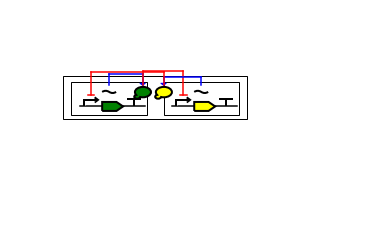

In [9]:
# get module frames
m_frames = draw.get_module_frames(design.modules)

# set axis
fig, ax = plt.subplots()
ax.set_xlim(XMIN, XMAX)
ax.set_ylim(YMIN, YMAX)
ax.set_axis_off()

user_options = [
    {
        'target': 'p1c',
        'size': 1.5,
        'facecolor': 'green'
    },
    {
        'target': 'rep1',
        'facecolor': 'green'
    },
    {
        'target': 'p2c',
        'size': 1.5,
        'facecolor': 'yellow'
    },
    {
        'target': 'rep2',
        'facecolor': 'yellow'
    }
]

# draw modules and interactions
draw.draw_all_modules(ax, m_frames, design.modules, user_params=user_options)
draw.draw_all_interactions(ax, design.interactions)

# don't forget plt.show()! 
plt.show